In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [70]:
df = pd.read_csv('concrete_data.csv')

In [71]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [72]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [73]:
df.shape

(1030, 9)

In [74]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [75]:
X = df.drop(columns ='Strength')
y = df.iloc[:,-1]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [77]:
X_train.shape

(824, 8)

In [78]:
# directly training the model without data transformation 
lr = LinearRegression()

lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
r2_score(y_predict,y_test)

0.42317047978909705

In [79]:
# Cross_validating with the cross_val_score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2',cv = 8))

0.33204145166014676

C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\1147131852.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\1147131852.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\11

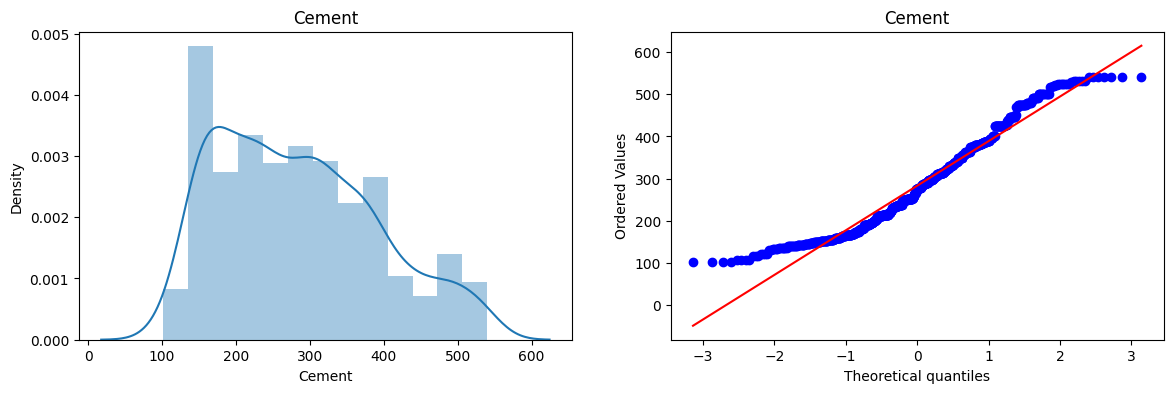

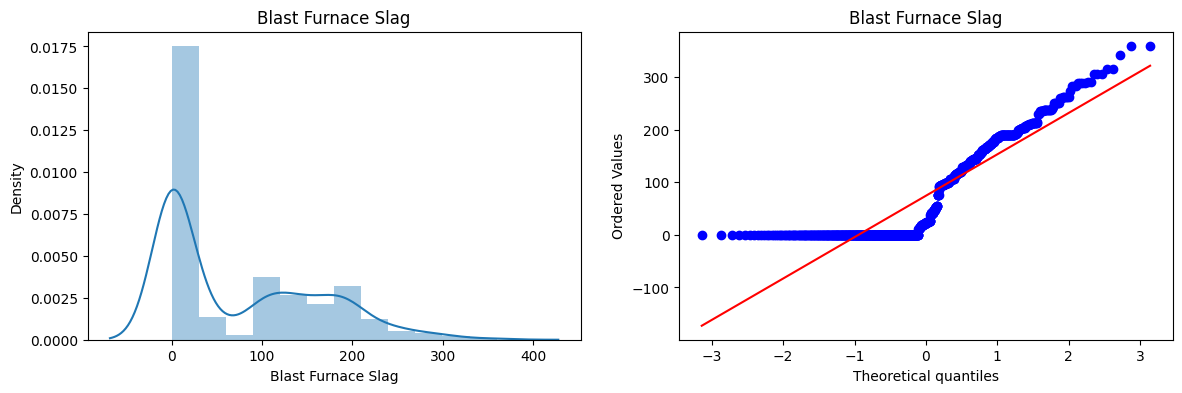

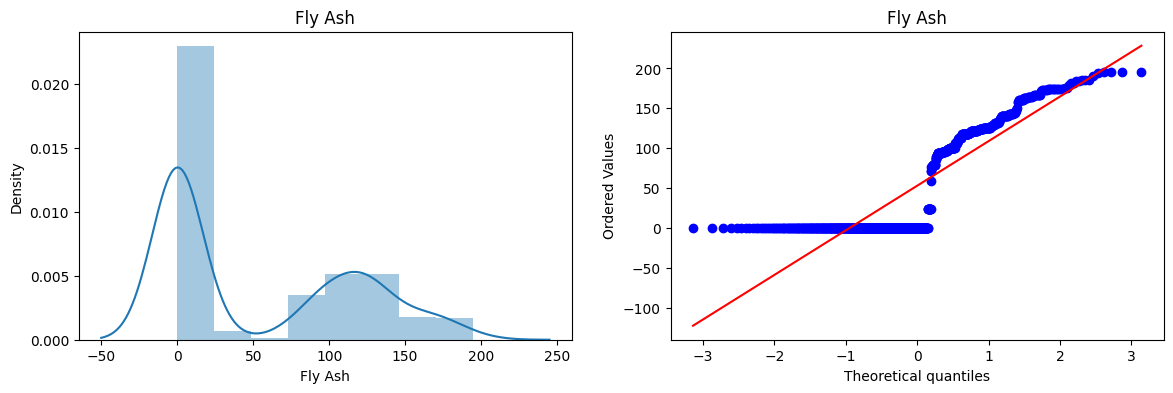

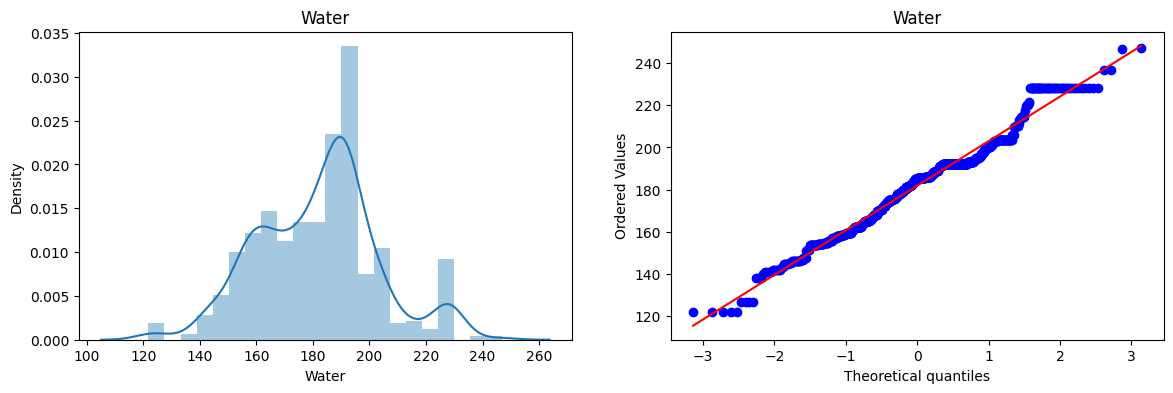

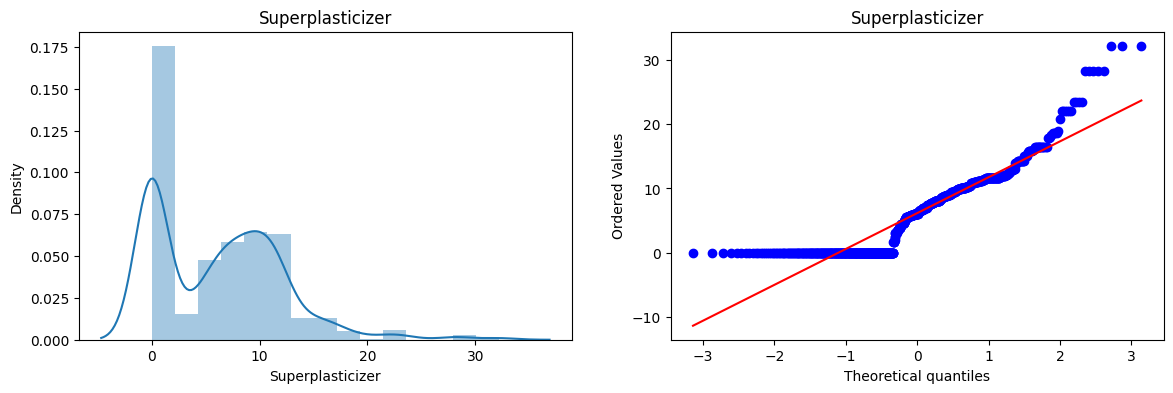

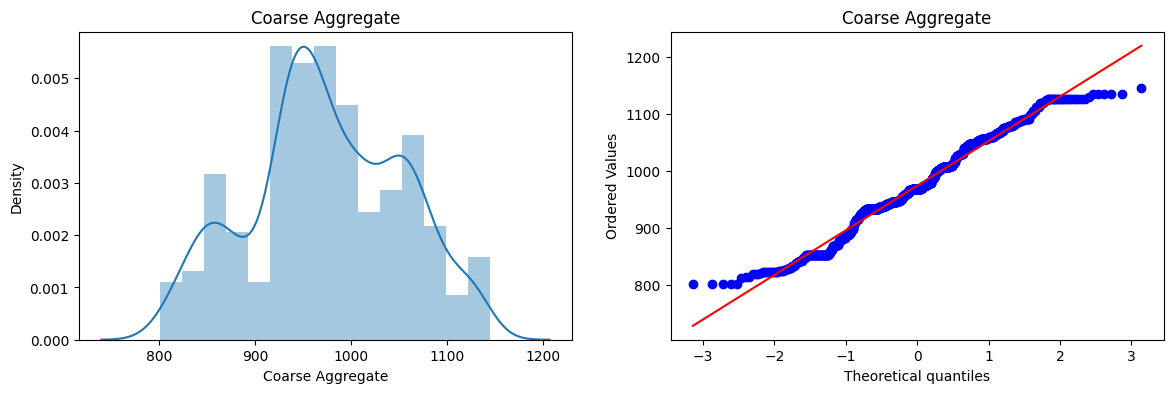

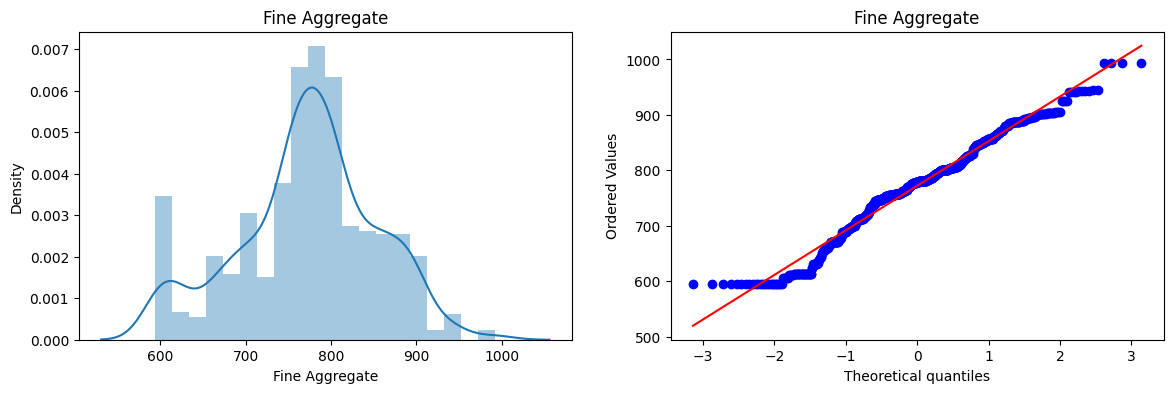

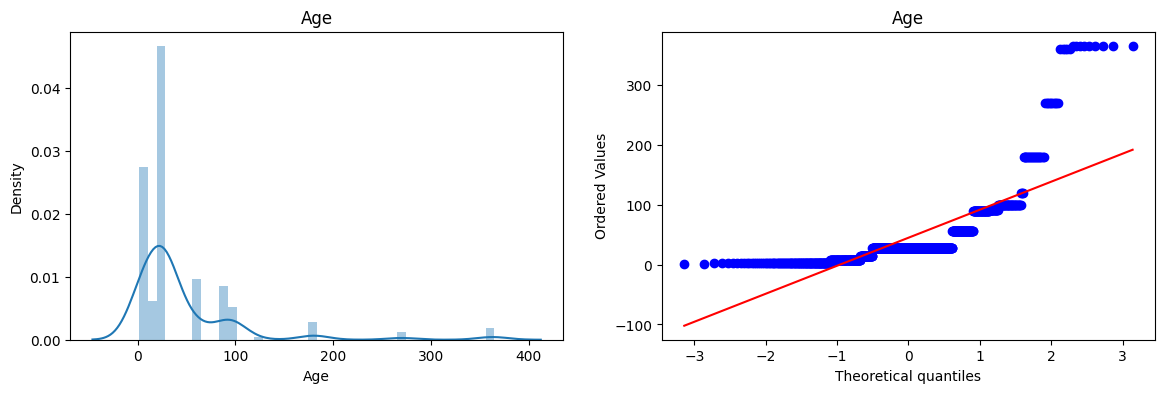

In [50]:
for cols in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(X_train[cols])
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(X_train[cols],dist='norm',plot = plt)
    plt.title(cols)

# Now i will transform the data with PowerTransformer

In [80]:
pt = PowerTransformer(method = 'box-cox')

In [81]:
X_train_transform = pt.fit_transform(X_train+0.000001)
X_test_transform = pt.transform(X_test+0.000001)

In [82]:
pd.DataFrame({'Cols': X_train.columns , 'Columns_lambda':pt.lambdas_})

,Cols,Columns_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [83]:
# here i had train the model with the box-cox transform data
lr = LinearRegression()
lr.fit(X_train_transform,y_train)
y_predict1 = lr.predict(X_test_transform)

In [84]:
r2_score(y_predict1,y_test)

0.7618995274364543

In [85]:
# here i converted the numpy array in dataframe format
X_train_transform = pd.DataFrame(X_train_transform,columns=X_train.columns)

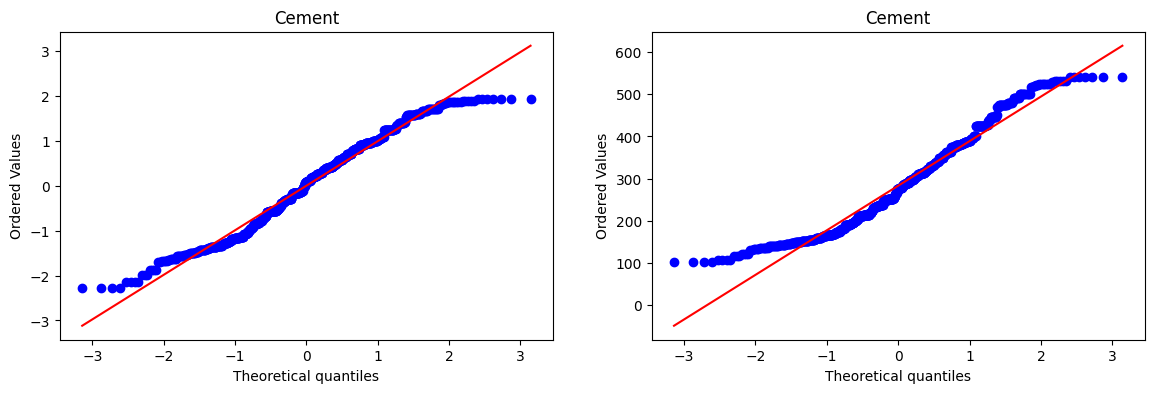

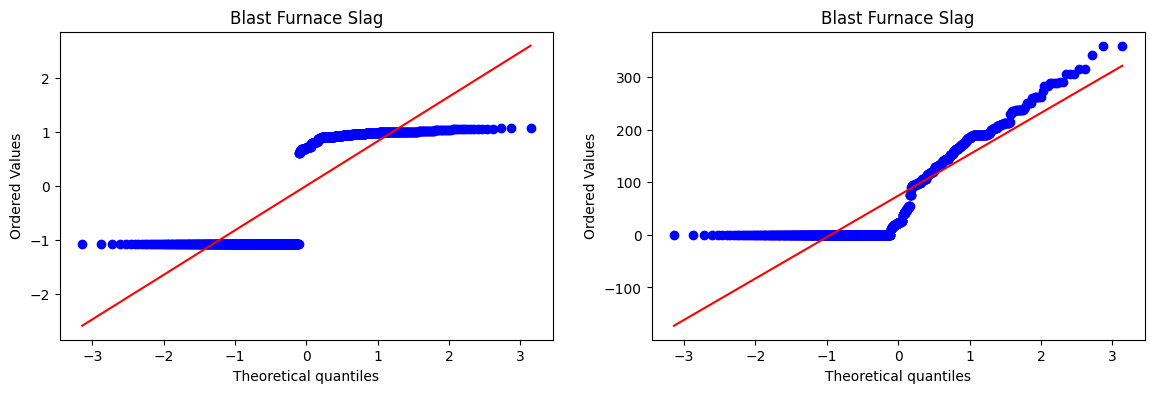

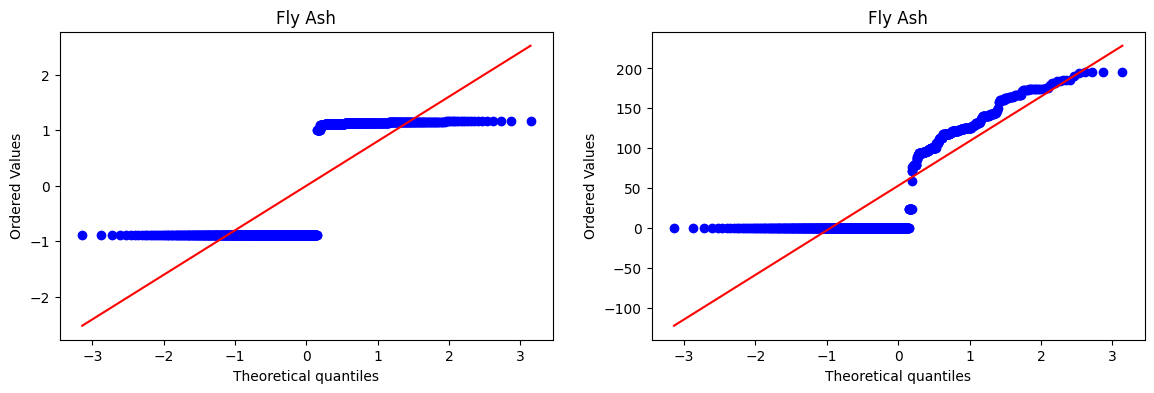

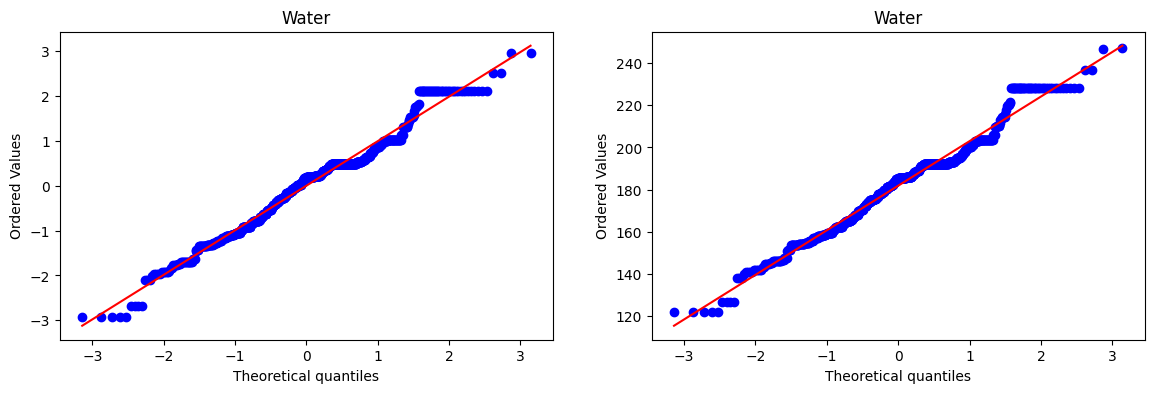

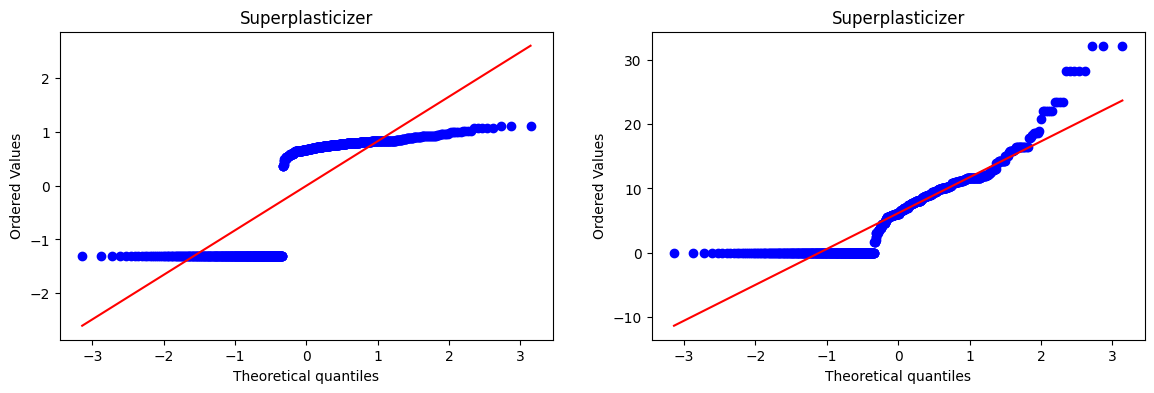

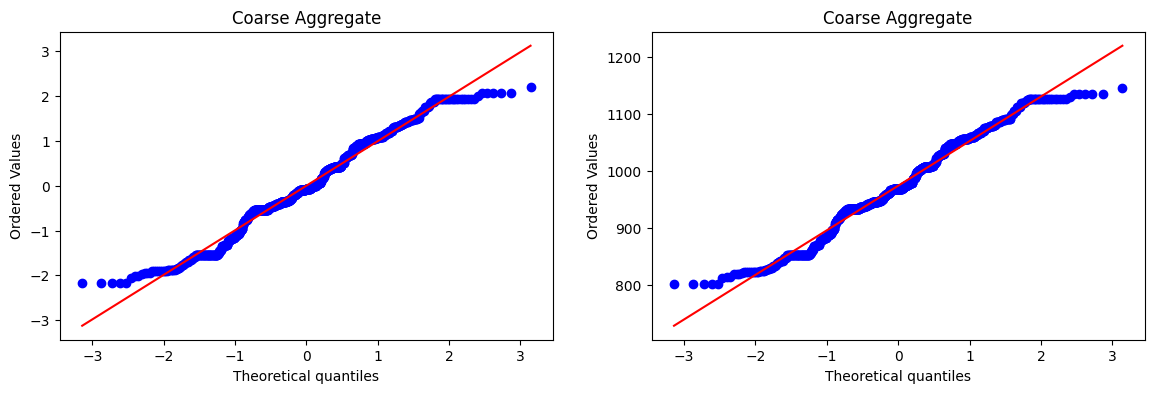

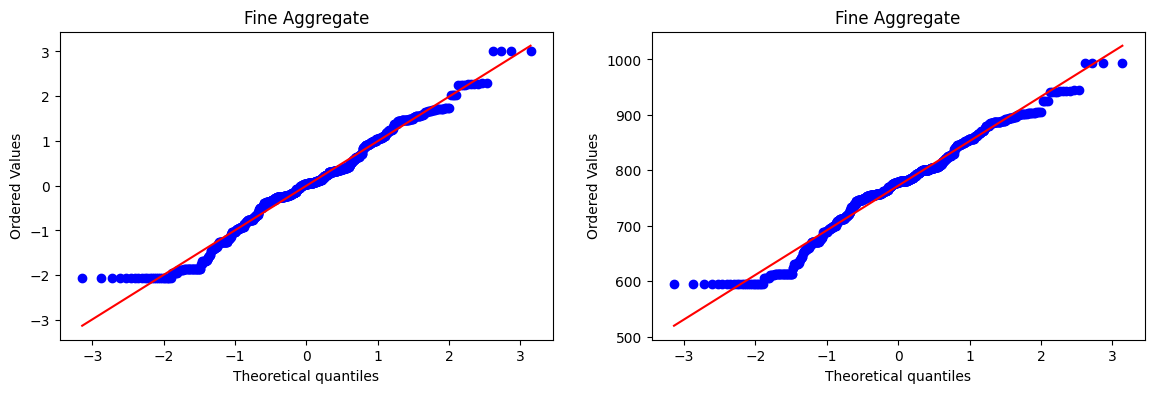

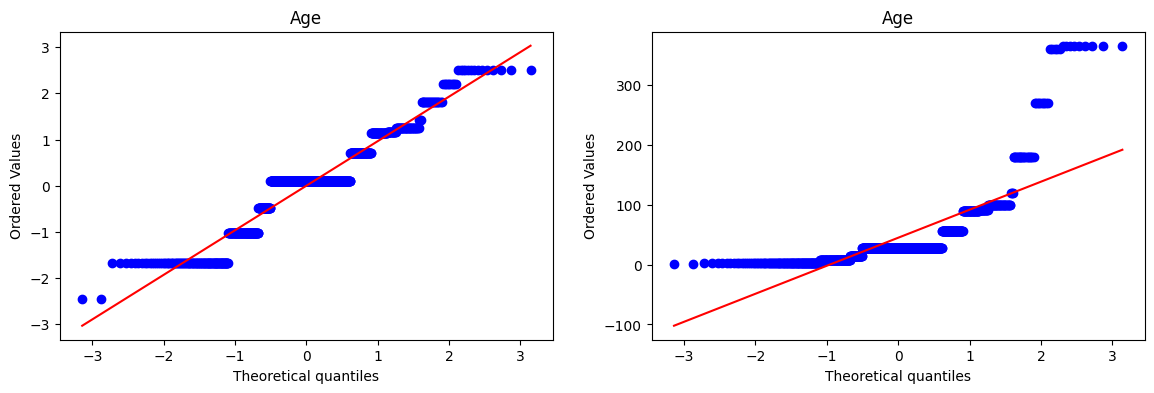

In [92]:
for cols in X_train_transform.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    stats.probplot(X_train_transform[cols],dist='norm',plot = plt)
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(X_train[cols],dist = 'norm', plot = plt)
    plt.title( cols)

In [94]:
pt1 = PowerTransformer()

In [95]:
X_train_transform2 = pt1.fit_transform(X_train)
X_test_transform2 = pt1.transform(X_test)

In [96]:
# here i had train the model with the yeo-jhonson transform data
lr = LinearRegression()
lr.fit(X_train_transform2,y_train)
y_predict2 = lr.predict(X_test_transform2)

In [97]:
r2_score(y_predict2,y_test)

0.7797686953273208

In [98]:
pd.DataFrame({'Cols': X_train.columns, 'X_train_yeo-johnson': pt1.lambdas_})

,Cols,X_train_yeo-johnson
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [99]:
X[:5]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [106]:
from sklearn.compose import ColumnTransformer

In [ ]:
# here i am applying powertransformer on the required column only 

In [119]:
trf = ColumnTransformer([
    ('pt2', PowerTransformer(),['Cement','Water', 'Coarse Aggregate', 'Fine Aggregate','Age'])
],remainder = 'passthrough' )

In [120]:
X_train_new = trf.fit_transform(X_train)
X_test_new = trf.transform(X_test)

In [121]:
X_train_new[:5]

array([[-1.27975060e+00, -3.01916718e-01, -2.62503970e-01,
        -6.77566986e-01,  1.05777635e-01,  1.48900000e+02,
         1.16000000e+02,  1.50000000e+01],
       [ 1.24481270e+00, -1.65050632e-01, -1.91271708e+00,
        -3.14063299e-01,  1.05777635e-01,  2.20000000e+01,
         1.32000000e+02,  8.50000000e+00],
       [ 7.97514458e-02, -1.04729864e+00,  1.01840694e+00,
         2.59544067e-02, -1.66497600e+00,  0.00000000e+00,
         1.21400000e+02,  9.90000000e+00],
       [-1.45769983e-01,  5.81232007e-01, -1.75077021e+00,
         5.83249096e-01,  1.05777635e-01,  9.70000000e+01,
         7.60000000e+01,  8.00000000e+00],
       [-1.13111128e+00, -1.10530521e+00,  1.36857899e+00,
         2.62619121e-01, -1.66497600e+00,  4.22000000e+01,
         1.24300000e+02,  1.08000000e+01]])

In [122]:
lr = LinearRegression()

lr.fit(X_train_new,y_train)
y_predict_new = lr.predict(X_test_new)

In [141]:
r2_score(y_predict_new, y_test)

0.787104953105888

In [136]:
X_transform_new = trf.transform(X)
np.mean(cross_val_score(lr,X_transform_new,y,scoring='r2', cv = 7))

0.7093574133484472

In [138]:
X_train_new = pd.DataFrame(X_train_new, columns = X_train.columns)

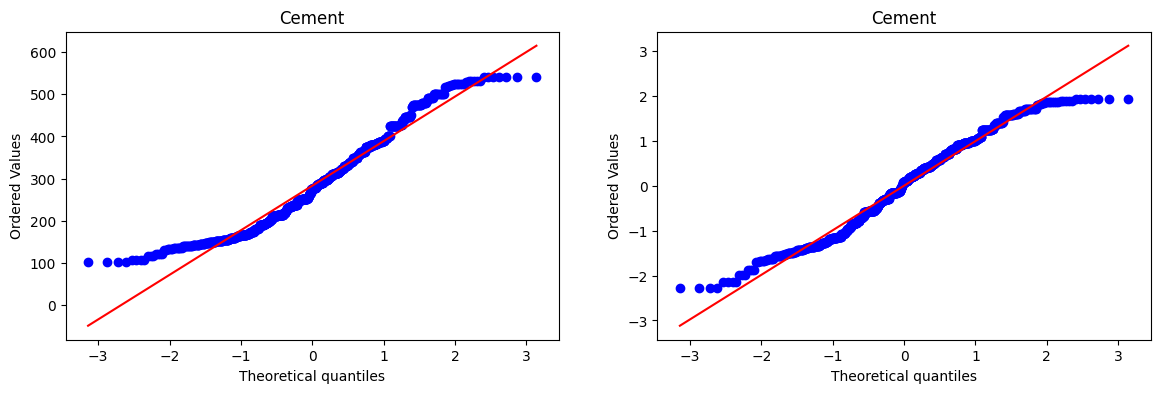

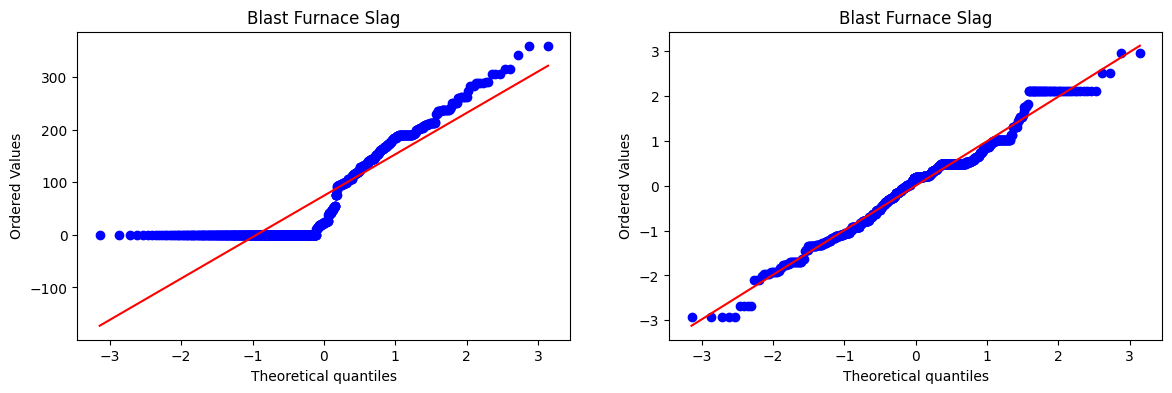

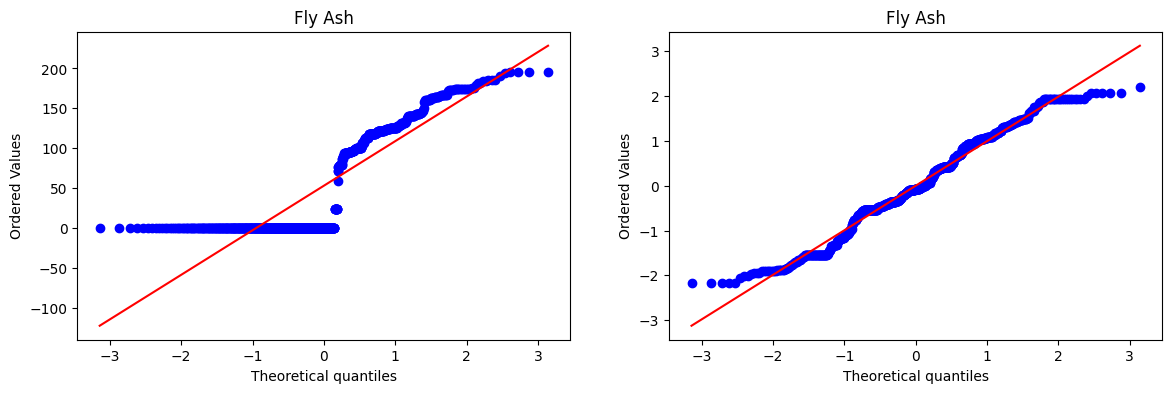

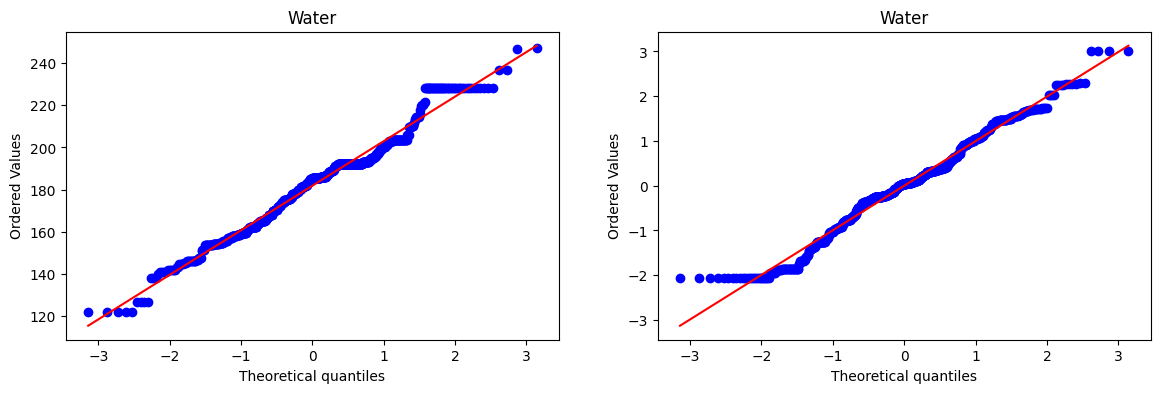

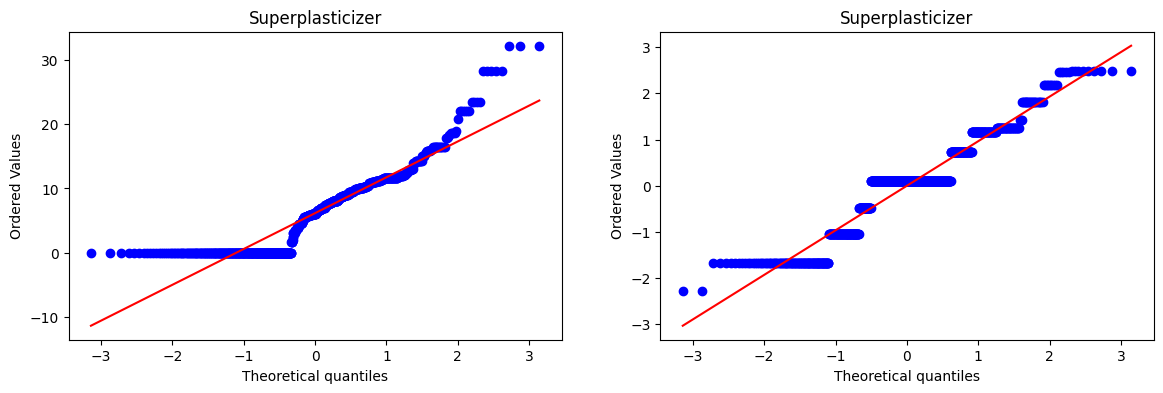

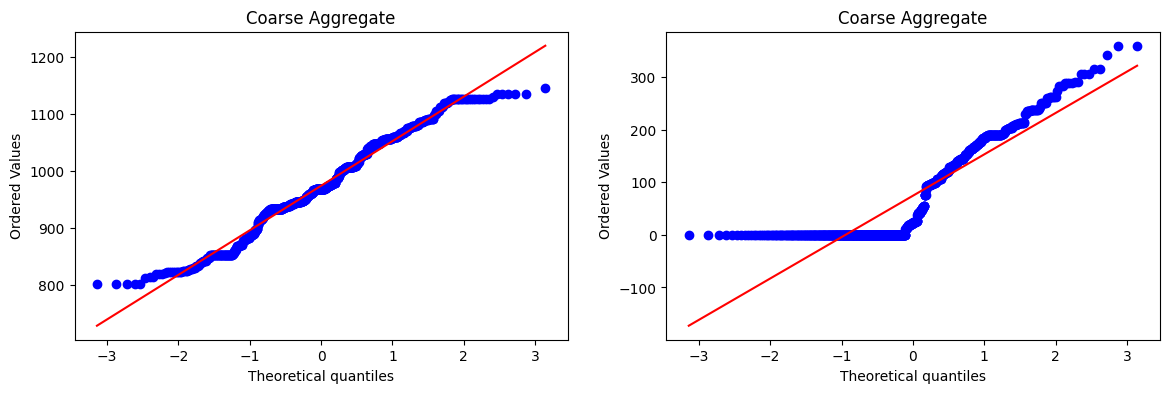

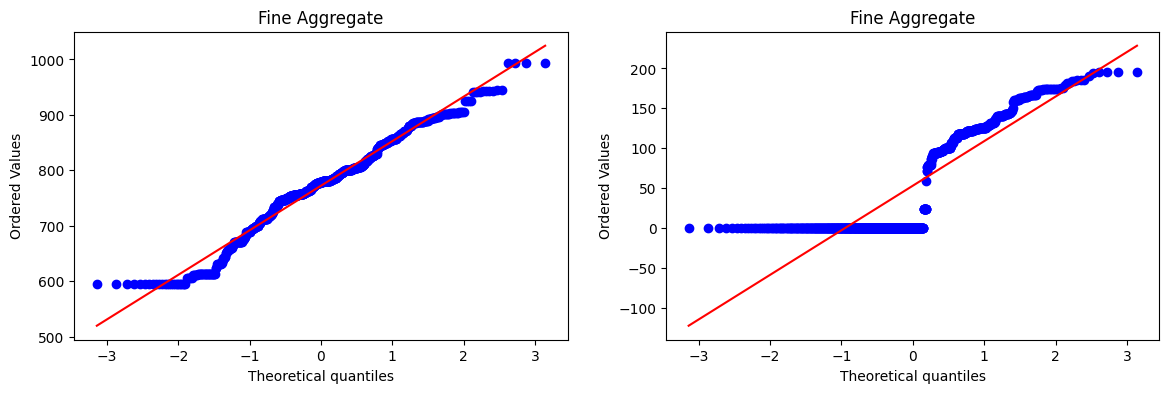

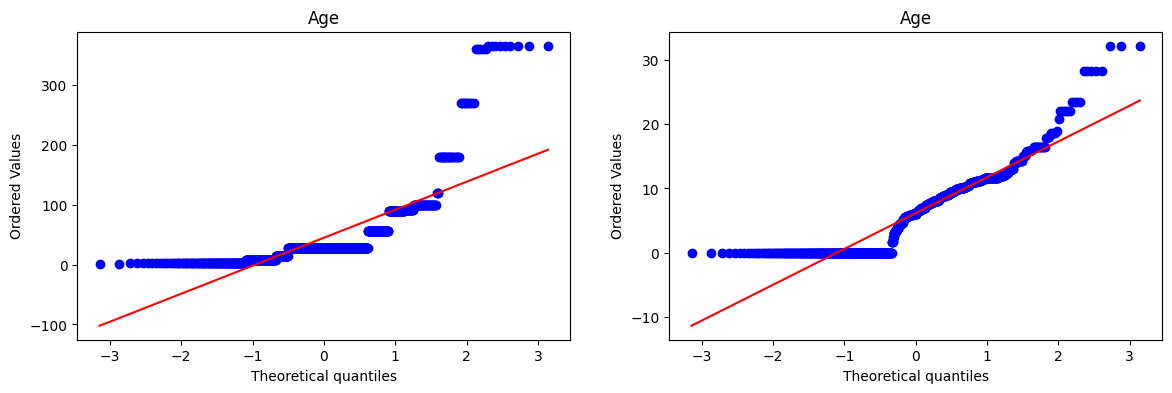

In [140]:
for cols in X_train_transform.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    stats.probplot(X_train[cols],dist='norm',plot = plt)
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(X_train_new[cols],dist = 'norm', plot = plt)
    plt.title( cols)